In [1]:
import pandas as pd

In [2]:
pdtrain = pd.read_csv('aps_failure_training_set.csv',na_values='na',skiprows=20)
pdtest = pd.read_csv('aps_failure_test_set.csv',na_values='na',skiprows=20)

In [29]:
trX = pdtrain.iloc[:,1:];
tsX = pdtest.iloc[:,1:];
trainY = pdtrain.iloc[:,0];
testY = pdtest.iloc[:,0];
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import Imputer

imp = Imputer(missing_values=float("NaN"), strategy='median', axis=0)  # mean , mean  are two of the imputation techniques that can be used, lets use median now
trainX = pd.DataFrame(imp.fit_transform(trX))
trainX.columns = trX.columns

testX = pd.DataFrame(imp.fit_transform(tsX))
testX.columns = tsX.columns

trainX.head()

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,76698.0,0.0,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,33058.0,0.0,0.000000e+00,126.0,0.0,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,41040.0,0.0,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,12.0,0.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,318.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,60874.0,0.0,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0


In [4]:
from imblearn.under_sampling import RandomUnderSampler

In [5]:
import random;
randomList = random.sample(range(0, 59000), 5900)

In [6]:
for region, df_region in pdtrain.groupby('class'):
    print(pdtrain)

      class  aa_000  ab_000        ac_000  ad_000  ae_000  af_000  ag_000  \
0       neg   76698     NaN  2.130706e+09   280.0     0.0     0.0     0.0   
1       neg   33058     NaN  0.000000e+00     NaN     0.0     0.0     0.0   
2       neg   41040     NaN  2.280000e+02   100.0     0.0     0.0     0.0   
3       neg      12     0.0  7.000000e+01    66.0     0.0    10.0     0.0   
4       neg   60874     NaN  1.368000e+03   458.0     0.0     0.0     0.0   
5       neg   38312     NaN  2.130706e+09   218.0     0.0     0.0     0.0   
6       neg      14     0.0  6.000000e+00     NaN     0.0     0.0     0.0   
7       neg  102960     NaN  2.130706e+09   116.0     0.0     0.0     0.0   
8       neg   78696     NaN  0.000000e+00     NaN     0.0     0.0     0.0   
9       pos  153204     0.0  1.820000e+02     NaN     0.0     0.0     0.0   
10      neg   39196     NaN  2.040000e+02   170.0     0.0     0.0     0.0   
11      neg   45912     NaN  0.000000e+00   454.0     0.0     0.0     0.0   

In [7]:
count=0
for i,j in pdtrain.groupby('class'):
    if(count==0):
        negDf = j;
    else:
        posDf = j;
    count=count+1;

In [8]:
negDf.shape

(59000, 171)

In [9]:
posDf.shape

(1000, 171)

In [10]:
underSampledNegDf = negDf.iloc[randomList,:]

In [11]:
underSampledNegDf.shape
underSampledNegDf.reset_index(inplace=True,drop=True)
underSampledNegDf

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,27068,NaN,2.980000e+02,248.0,0.0,0.0,0.0,0.0,0.0,...,396924.0,170624.0,290202.0,186852.0,89144.0,51168.0,68288.0,714.0,0.0,0.0
1,neg,31204,NaN,1.960000e+02,194.0,0.0,0.0,0.0,0.0,0.0,...,221358.0,117318.0,265176.0,235564.0,219080.0,138490.0,173734.0,7292.0,0.0,0.0
2,neg,0,0.0,0.000000e+00,60.0,0.0,0.0,0.0,0.0,0.0,...,306.0,26.0,8.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0
3,neg,131506,0.0,2.130706e+09,466.0,56.0,60.0,0.0,0.0,762.0,...,496278.0,257818.0,520898.0,521846.0,3410444.0,500680.0,3882.0,0.0,0.0,0.0
4,neg,185482,0.0,2.540000e+02,30.0,84.0,2818.0,0.0,0.0,3728.0,...,801470.0,624728.0,988672.0,1711418.0,2019890.0,2039906.0,44452.0,0.0,0.0,0.0
5,neg,16,0.0,2.000000e+00,2.0,0.0,0.0,0.0,0.0,0.0,...,180.0,94.0,108.0,56.0,76.0,0.0,0.0,0.0,0.0,0.0
6,neg,64252,0.0,1.520000e+02,10.0,0.0,0.0,0.0,0.0,0.0,...,215814.0,111388.0,276804.0,189550.0,329110.0,1546160.0,63662.0,20.0,0.0,0.0
7,neg,18,0.0,2.000000e+00,2.0,0.0,0.0,0.0,0.0,0.0,...,96.0,26.0,70.0,48.0,58.0,40.0,0.0,0.0,0.0,0.0
8,neg,120284,NaN,2.130706e+09,626.0,0.0,0.0,0.0,0.0,0.0,...,766964.0,403622.0,878286.0,1137524.0,1170234.0,945316.0,15222.0,12.0,0.0,0.0
9,neg,18,NaN,1.200000e+01,NaN,0.0,0.0,0.0,0.0,0.0,...,146.0,40.0,70.0,58.0,48.0,40.0,0.0,0.0,0.0,0.0


In [12]:
PosRandomList = random.sample(range(0, 1000), 100)

In [13]:
underSampledPosDf = posDf.iloc[PosRandomList,:]
underSampledPosDf.reset_index(inplace=True,drop=True)
underSampledPosDf

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,pos,404336,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,...,3029868.0,1449350.0,2715640.0,2243914.0,2101432.0,1720632.0,3714842.0,354362.0,0.0,0.0
1,pos,668008,NaN,1.582000e+03,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,pos,1146336,NaN,9.120000e+02,NaN,0.0,0.0,544866.0,3708310.0,9042380.0,...,4332530.0,2516280.0,17872560.0,18157542.0,7770260.0,140360.0,25238.0,0.0,0.0,0.0
3,pos,325032,NaN,4.500000e+02,22.0,0.0,0.0,0.0,918.0,159932.0,...,2159056.0,1298858.0,3361630.0,939030.0,4570684.0,2459588.0,6698.0,0.0,0.0,0.0
4,pos,219642,NaN,9.200000e+02,776.0,0.0,0.0,0.0,67628.0,534048.0,...,1541536.0,732216.0,1843074.0,2109702.0,2369276.0,1106600.0,79330.0,276.0,0.0,0.0
5,pos,1077172,0.0,8.080000e+02,98.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,12.0
6,pos,250836,6.0,1.460000e+03,462.0,0.0,0.0,58270.0,1467566.0,3864894.0,...,1595914.0,785486.0,2004098.0,3067312.0,3294048.0,446414.0,6276.0,0.0,0.0,0.0
7,pos,1356594,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,...,5898640.0,3211944.0,6978392.0,7536384.0,8793946.0,8103360.0,11356562.0,310222.0,0.0,0.0
8,pos,358498,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,...,3335874.0,1840708.0,4499262.0,3948308.0,1931828.0,661982.0,525936.0,9358.0,0.0,0.0
9,pos,1099388,NaN,NaN,NaN,NaN,NaN,0.0,98586.0,1667334.0,...,6224956.0,3180308.0,7604960.0,8972760.0,10559786.0,11892992.0,456124.0,102.0,NaN,NaN


In [14]:
underSampledDf = pd.concat([underSampledNegDf,underSampledPosDf],axis=0)

In [15]:
underSampledDf.shape

(6000, 171)

In [16]:
underSampledDf.reset_index(inplace=True,drop=True)
underSampledDf

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,27068,NaN,2.980000e+02,248.0,0.0,0.0,0.0,0.0,0.0,...,396924.0,170624.0,290202.0,186852.0,89144.0,51168.0,68288.0,714.0,0.0,0.0
1,neg,31204,NaN,1.960000e+02,194.0,0.0,0.0,0.0,0.0,0.0,...,221358.0,117318.0,265176.0,235564.0,219080.0,138490.0,173734.0,7292.0,0.0,0.0
2,neg,0,0.0,0.000000e+00,60.0,0.0,0.0,0.0,0.0,0.0,...,306.0,26.0,8.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0
3,neg,131506,0.0,2.130706e+09,466.0,56.0,60.0,0.0,0.0,762.0,...,496278.0,257818.0,520898.0,521846.0,3410444.0,500680.0,3882.0,0.0,0.0,0.0
4,neg,185482,0.0,2.540000e+02,30.0,84.0,2818.0,0.0,0.0,3728.0,...,801470.0,624728.0,988672.0,1711418.0,2019890.0,2039906.0,44452.0,0.0,0.0,0.0
5,neg,16,0.0,2.000000e+00,2.0,0.0,0.0,0.0,0.0,0.0,...,180.0,94.0,108.0,56.0,76.0,0.0,0.0,0.0,0.0,0.0
6,neg,64252,0.0,1.520000e+02,10.0,0.0,0.0,0.0,0.0,0.0,...,215814.0,111388.0,276804.0,189550.0,329110.0,1546160.0,63662.0,20.0,0.0,0.0
7,neg,18,0.0,2.000000e+00,2.0,0.0,0.0,0.0,0.0,0.0,...,96.0,26.0,70.0,48.0,58.0,40.0,0.0,0.0,0.0,0.0
8,neg,120284,NaN,2.130706e+09,626.0,0.0,0.0,0.0,0.0,0.0,...,766964.0,403622.0,878286.0,1137524.0,1170234.0,945316.0,15222.0,12.0,0.0,0.0
9,neg,18,NaN,1.200000e+01,NaN,0.0,0.0,0.0,0.0,0.0,...,146.0,40.0,70.0,58.0,48.0,40.0,0.0,0.0,0.0,0.0


In [17]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import Imputer

imp = Imputer(missing_values=float("NaN"), strategy='median', axis=0)  # mean , mean  are two of the imputation techniques that can be used, lets use median now
trainX = pd.DataFrame(imp.fit_transform(underSampledDf.iloc[:,1:]))
trainX.columns = underSampledDf.columns[1:]

trainX.head()

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,27068.0,0.0,2.980000e+02,248.0,0.0,0.0,0.0,0.0,0.0,0.0,...,396924.0,170624.0,290202.0,186852.0,89144.0,51168.0,68288.0,714.0,0.0,0.0
1,31204.0,0.0,1.960000e+02,194.0,0.0,0.0,0.0,0.0,0.0,0.0,...,221358.0,117318.0,265176.0,235564.0,219080.0,138490.0,173734.0,7292.0,0.0,0.0
2,0.0,0.0,0.000000e+00,60.0,0.0,0.0,0.0,0.0,0.0,0.0,...,306.0,26.0,8.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0
3,131506.0,0.0,2.130706e+09,466.0,56.0,60.0,0.0,0.0,762.0,161276.0,...,496278.0,257818.0,520898.0,521846.0,3410444.0,500680.0,3882.0,0.0,0.0,0.0
4,185482.0,0.0,2.540000e+02,30.0,84.0,2818.0,0.0,0.0,3728.0,1250532.0,...,801470.0,624728.0,988672.0,1711418.0,2019890.0,2039906.0,44452.0,0.0,0.0,0.0


In [18]:
# lets try out SMOTE first 
# https://www.kaggle.com/qianchao/smote-with-imbalance-data          -------- USE THIS CODE
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE 

sm = SMOTE(random_state=5)
x_res, y_res = sm.fit_sample(trainX, underSampledDf.iloc[:,0])
print('Resampled dataset shape {}'.format(Counter(y_res)))

Resampled dataset shape Counter({'neg': 5900, 'pos': 5900})


In [19]:
X_tr = pd.DataFrame(x_res);
Y_tr = pd.DataFrame(y_res);
X_tr.columns = pdtrain.columns[1:]
Y_tr.columns = ['class']
df_smote =pd.concat([Y_tr,X_tr],axis=1)
display(df_smote)
print(df_smote.shape)

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,2.706800e+04,0.000000,2.980000e+02,248.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,...,3.969240e+05,1.706240e+05,2.902020e+05,1.868520e+05,8.914400e+04,5.116800e+04,6.828800e+04,714.000000,0.000000,0.000000
1,neg,3.120400e+04,0.000000,1.960000e+02,194.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,...,2.213580e+05,1.173180e+05,2.651760e+05,2.355640e+05,2.190800e+05,1.384900e+05,1.737340e+05,7292.000000,0.000000,0.000000
2,neg,0.000000e+00,0.000000,0.000000e+00,60.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,...,3.060000e+02,2.600000e+01,8.000000e+00,6.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
3,neg,1.315060e+05,0.000000,2.130706e+09,466.000000,56.000000,60.000000,0.000000,0.000000,7.620000e+02,...,4.962780e+05,2.578180e+05,5.208980e+05,5.218460e+05,3.410444e+06,5.006800e+05,3.882000e+03,0.000000,0.000000,0.000000
4,neg,1.854820e+05,0.000000,2.540000e+02,30.000000,84.000000,2818.000000,0.000000,0.000000,3.728000e+03,...,8.014700e+05,6.247280e+05,9.886720e+05,1.711418e+06,2.019890e+06,2.039906e+06,4.445200e+04,0.000000,0.000000,0.000000
5,neg,1.600000e+01,0.000000,2.000000e+00,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,...,1.800000e+02,9.400000e+01,1.080000e+02,5.600000e+01,7.600000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
6,neg,6.425200e+04,0.000000,1.520000e+02,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,...,2.158140e+05,1.113880e+05,2.768040e+05,1.895500e+05,3.291100e+05,1.546160e+06,6.366200e+04,20.000000,0.000000,0.000000
7,neg,1.800000e+01,0.000000,2.000000e+00,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,...,9.600000e+01,2.600000e+01,7.000000e+01,4.800000e+01,5.800000e+01,4.000000e+01,0.000000e+00,0.000000,0.000000,0.000000
8,neg,1.202840e+05,0.000000,2.130706e+09,626.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,...,7.669640e+05,4.036220e+05,8.782860e+05,1.137524e+06,1.170234e+06,9.453160e+05,1.522200e+04,12.000000,0.000000,0.000000
9,neg,1.800000e+01,0.000000,1.200000e+01,127.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,...,1.460000e+02,4.000000e+01,7.000000e+01,5.800000e+01,4.800000e+01,4.000000e+01,0.000000e+00,0.000000,0.000000,0.000000


(11800, 171)


In [28]:
import weka.core.jvm as jvm
from weka.core.converters import Loader
from weka.classifiers import Classifier
import warnings
warnings.filterwarnings('ignore')
jvm.start()

df_smote.to_csv('aps_smote8.csv', index=False)

INFO:weka.core.jvm:JVM already running, call jvm.stop() first


In [21]:
import weka.core.converters as converters

data = converters.load_any_file("aps_smote8.csv")
data.class_is_first()

In [22]:
from weka.core.classes import Random
# uncomment for running the code
from weka.classifiers import Evaluation
from weka.core.classes import Random

cls = Classifier(classname="weka.classifiers.trees.LMT")
cls.build_classifier(data)

In [23]:
evl = Evaluation(data)
evl.crossvalidate_model(classifier=cls,num_folds=2,data=data,rnd=Random(1))

In [24]:
evl.summary()

'\nCorrectly Classified Instances       11680               98.9831 %\nIncorrectly Classified Instances       120                1.0169 %\nKappa statistic                          0.9797\nMean absolute error                      0.0145\nRoot mean squared error                  0.0944\nRelative absolute error                  2.9036 %\nRoot relative squared error             18.8857 %\nTotal Number of Instances            11800     \n'


Correctly Classified Instances       11680               98.9831 %
Incorrectly Classified Instances       120                1.0169 %
Kappa statistic                          0.9797
Mean absolute error                      0.0145
Root mean squared error                  0.0944
Relative absolute error                  2.9036 %
Root relative squared error             18.8857 %
Total Number of Instances            11800     

=== Detailed Accuracy By Class ===

                 TP Rate  FP Rate  Precision  Recall   F-Measure  MCC      ROC Area  PRC Area  Class
                 0.981    0.001    0.999      0.981    0.990      0.980    0.995     0.997     neg
                 0.999    0.019    0.981      0.999    0.990      0.980    0.995     0.991     pos
Weighted Avg.    0.990    0.010    0.990      0.990    0.990      0.980    0.995     0.994     

=== Confusion Matrix ===

    a    b   <-- classified as
 5786  114 |    a = neg
    6 5894 |    b = pos

areaUnderPRC/0: 0.9969068497481591

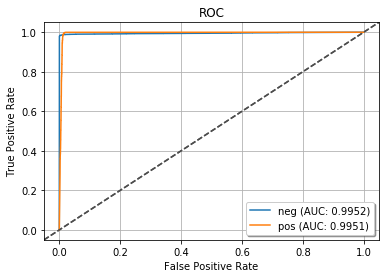

In [27]:
warnings.filterwarnings('ignore')
print(evl.summary())
print(evl.class_details())
print(evl.matrix())
print("areaUnderPRC/0: " + str(evl.area_under_prc(0)))
print("weightedAreaUnderPRC: " + str(evl.weighted_area_under_prc))
print("areaUnderROC/1: " + str(evl.area_under_roc(1)))
print("weightedAreaUnderROC: " + str(evl.weighted_area_under_roc))
print("avgCost: " + str(evl.avg_cost))
print("totalCost: " + str(evl.total_cost)) 
print("confusionMatrix: " + str(evl.confusion_matrix))

warnings.filterwarnings('ignore')


import weka.plot.classifiers as plcls  # NB: matplotlib is required
plcls.plot_roc(evl, class_index=[0, 1], wait=True)

In [26]:
print(evl.area_under_roc(class_index=0))
print(evl.area_under_roc(class_index=1))
print(evl.area_under_prc(class_index=0))
print(evl.area_under_prc(class_index=1))
print(evl.confusion_matrix)
print(evl.error_rate)
print(evl.f_measure(class_index=0))
print(evl.f_measure(class_index=1))
print(evl.false_negative_rate(class_index=0))
print(evl.false_negative_rate(class_index=1))
print(evl.false_positive_rate(class_index=0))
print(evl.false_positive_rate(class_index=1))
evl.percent_incorrect


0.9951839988509049
0.9950720769893708
0.9969068497481591
0.9907508398041714
[[5786.  114.]
 [   6. 5894.]]
0.010169491525423728
0.9897365720150529
0.9899227410144441
0.019322033898305085
0.001016949152542373
0.001016949152542373
0.019322033898305085


1.0169491525423728